In [1]:
import gmm

In [2]:
%matplotlib inline

In [3]:

data, _ = gmm.make_blobs(n_samples=10000, centers=10, n_features=2, random_state=9)
data.shape

(10000, 2)

In [4]:
import matplotlib.pyplot as plt

In [15]:
model = gmm.initialize(data, 10)

for _ in range(1000):
    r = gmm.expect(model, data)
    
    # gmm.maximize(model, r, data)
    # print(model.means)
    # print(model.weights)
    # print(model.covs)

    gmm.maximize_v2(model, r, data)
    print(model.means)
    print(model.weights)
    print(model.covs)
    

[[-1.21543017 -1.45793199]
 [-1.13689497 -1.40380124]
 [-1.2094583  -1.38297383]
 [-1.07467765 -1.33336627]
 [-1.23399317 -1.33166895]
 [-1.20485534 -1.36354268]
 [-1.13641237 -1.38545688]
 [-1.18165    -1.49222018]
 [-1.11896324 -1.36859544]
 [-1.11967959 -1.42167133]]
[0.09963141 0.10052433 0.10129774 0.09715131 0.10017264 0.09908716
 0.09988909 0.10067988 0.09914386 0.10242259]
[[[42.07954164 -3.63954583]
  [-3.63954583 27.97104335]]

 [[42.28131993 -4.75895732]
  [-4.75895732 28.82032025]]

 [[41.82295512 -3.64979586]
  [-3.64979586 28.1993976 ]]

 [[42.38698707 -3.69636798]
  [-3.69636798 28.32180459]]

 [[41.81899394 -3.32588616]
  [-3.32588616 27.99904676]]

 [[42.14647844 -3.80607227]
  [-3.80607227 28.20245432]]

 [[41.9343081  -3.14337378]
  [-3.14337378 27.86906967]]

 [[42.15120348 -3.77549601]
  [-3.77549601 27.96199965]]

 [[42.07475264 -4.36846369]
  [-4.36846369 28.71099589]]

 [[42.03122696 -3.22270929]
  [-3.22270929 27.87841778]]]
[[-1.22124671 -1.45825988]
 [-1.1107

In [16]:
r.shape

(10, 10000)

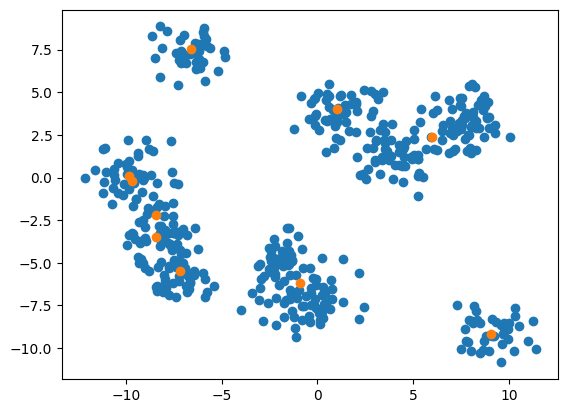

In [17]:
plt.scatter(data[:500,0],data[:500,1])
plt.scatter(model.means[:,0],model.means[:,1])


In [7]:
model.means.shape

(3, 2)

In [8]:
model.covs.shape

(3, 2, 2)

In [9]:
model.covs

array([[[ 0.95269356, -0.02557371],
        [-0.02557371,  0.94300414]],

       [[ 0.84190887,  0.01436747],
        [ 0.01436747,  1.03474543]],

       [[ 1.13573262,  0.09591968],
        [ 0.09591968,  0.9210592 ]]])

In [10]:
model.weights

array([0.33399984, 0.33300016, 0.333     ])

In [1]:
import gmm
gmm.bench()

With einsum — fastest: 0.028547351938999783, slowest: 0.029028527366999696, mean: 0.028806246293714203 
With loops — fastest: 0.02038862917100005, slowest: 0.02063717341199981, mean: 0.020572978542571427 
With loops — fastest: 0.012348123220000161, slowest: 0.015724272164000012, mean: 0.014820868072571557 


In [18]:
data, _ = gmm.make_blobs(n_samples=10000, centers=20, n_features=2, random_state=7)
model = gmm.initialize(data, 20)
print(",",model.means)
r = gmm.expect(model, data)

, [[ 0.04210255  0.11365904]
 [-0.06531271  0.19952699]
 [-0.00245374  0.00960645]
 [-0.12941115  0.19015409]
 [-0.03748055  0.11378702]
 [-0.00074172  0.03992029]
 [-0.05646902  0.1031639 ]
 [ 0.0029812   0.1142687 ]
 [-0.06743645  0.07973013]
 [-0.09089831  0.10931822]
 [ 0.05872609  0.13166979]
 [-0.03287121  0.08222056]
 [-0.00603992  0.12200819]
 [-0.02096255  0.15693287]
 [-0.03212402  0.09659986]
 [-0.06386258  0.09300884]
 [ 0.05150056  0.09192575]
 [-0.01844064  0.06219707]
 [-0.06088031  0.06063031]
 [ 0.00316494 -0.00941949]]


In [19]:
%%timeit 
gmm.maximize(model, r, data)

13.4 ms ± 81.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [8]:
data, _ = gmm.make_blobs(n_samples=10000, centers=20, n_features=2, random_state=7)


model = gmm.initialize(data, 20)
print(",",model.means)
r = gmm.expect(model, data)

, [[-0.02560193  0.07368742]
 [-0.05365094  0.11073272]
 [ 0.05536421  0.10800119]
 [-0.07484387  0.06149507]
 [-0.02736194  0.12333151]
 [-0.01917649  0.16748226]
 [-0.00464819  0.17799184]
 [ 0.01873524 -0.02492527]
 [-0.03711703  0.11127306]
 [-0.10826971  0.04054342]
 [-0.05198289  0.12367164]
 [-0.10572597  0.01198313]
 [ 0.06800878  0.12303315]
 [-0.04078583  0.11512411]
 [-0.01127421  0.1031841 ]
 [-0.00709978  0.09877436]
 [ 0.01365355  0.12320963]
 [-0.09217224  0.06664048]
 [ 0.0329261   0.12744405]
 [-0.05762493  0.1182739 ]]


In [9]:
%%timeit 
gmm.maximize_v0(model, r, data)

9.88 ms ± 101 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [13]:
data, _ = gmm.make_blobs(n_samples=10000, centers=20, n_features=2, random_state=7)


model = gmm.initialize(data, 20)
print(",",model.means)
r = gmm.expect(model, data)

, [[ 0.01303278  0.03232259]
 [ 0.03007759 -0.00979814]
 [ 0.00878647  0.20928161]
 [ 0.00977369  0.12814327]
 [ 0.01905774 -0.00721858]
 [-0.10459065  0.18182304]
 [-0.00466496  0.15359819]
 [-0.06503088  0.09265151]
 [-0.03162922  0.1122391 ]
 [-0.07492917  0.14722967]
 [-0.03443325  0.01094912]
 [-0.01439331  0.06042731]
 [-0.02322892  0.19850668]
 [-0.03299789  0.10188433]
 [-0.15292531  0.17330506]
 [ 0.03673294  0.06799069]
 [ 0.04710358 -0.02206897]
 [-0.05677599  0.05328063]
 [-0.05136194  0.18697917]
 [-0.04506261  0.09056511]]


In [14]:
%%timeit 
gmm.maximize_v3(model, r, data)

6.16 ms ± 1.49 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
data, _ = gmm.make_blobs(n_samples=10000, centers=10, n_features=2, random_state=7)
responsibilities = np.random.dirichlet(n_components * [alpha], data.shape[0]).T


In [49]:
import numpy as np
a = np.arange(12).reshape(4,3)
b = np.array([10,20,30,40])
a,b

(array([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]]),
 array([10, 20, 30, 40]))

In [51]:
a*b[:,np.newaxis]

array([[  0,  10,  20],
       [ 60,  80, 100],
       [180, 210, 240],
       [360, 400, 440]])

In [50]:
np.einsum('mn, m  -> mn', a,b)

array([[  0,  10,  20],
       [ 60,  80, 100],
       [180, 210, 240],
       [360, 400, 440]])

In [55]:
a*b[:,np.newaxis]@a.T

array([[   50,   140,   230,   320],
       [  280,  1000,  1720,  2440],
       [  690,  2580,  4470,  6360],
       [ 1280,  4880,  8480, 12080]])

In [56]:
np.einsum('mn, m, kn -> mk', a,b,a)

array([[   50,   140,   230,   320],
       [  280,  1000,  1720,  2440],
       [  690,  2580,  4470,  6360],
       [ 1280,  4880,  8480, 12080]])

with same dinemsions as in the example

In [61]:
import numpy as np
A = np.arange(24).reshape(2,4,3)
B = np.arange(8).reshape(2,4)
A, B

(array([[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8],
         [ 9, 10, 11]],
 
        [[12, 13, 14],
         [15, 16, 17],
         [18, 19, 20],
         [21, 22, 23]]]),
 array([[0, 1, 2, 3],
        [4, 5, 6, 7]]))

In [65]:
np.array([ a.T*b[:,np.newaxis].T @a for a,b in zip(A,B)])

array([[[ 324,  366,  408],
        [ 366,  414,  462],
        [ 408,  462,  516]],

       [[6732, 7110, 7488],
        [7110, 7510, 7910],
        [7488, 7910, 8332]]])

In [68]:
c = np.einsum('knd, kn, kne -> kde', A,B,A)
c, c.shape

(array([[[ 324,  366,  408],
         [ 366,  414,  462],
         [ 408,  462,  516]],
 
        [[6732, 7110, 7488],
         [7110, 7510, 7910],
         [7488, 7910, 8332]]]),
 (2, 3, 3))